<a href="https://colab.research.google.com/github/thekaszsz/project-Yongsan_python.miniproject/blob/main/%E1%84%8B%E1%85%AD%E1%86%BC%E1%84%89%E1%85%A1%E1%86%AB%E1%84%8B%E1%85%A7%E1%84%89%E1%85%A5%E1%86%BC%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%85%E1%85%A7%E1%86%A8%E1%84%89%E1%85%A6%E1%86%AB%E1%84%90%E1%85%A5_2%E1%84%8B%E1%85%B5%E1%86%AF%E1%84%8E%E1%85%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from tqdm import tqdm

**tqdm 설명**

In [ ]:
import time

In [ ]:
for i in tqdm(range(10)):
    time.sleep(i*0.2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.10it/s]


In [ ]:
%%time
for i in tqdm(range(10)):
    time.sleep(i*0.2)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.11it/s]

CPU times: user 21.1 ms, sys: 7.65 ms, total: 28.7 ms
Wall time: 9.05 s


**정규성 검정 시뮬레이션**

In [ ]:
n = 10000
iter_count = 1000
pvalues = []
for i in tqdm(range(iter_count)):
    samples = np.random.normal(0, 1, n)
    ks_result = stats.kstest(samples, 'norm')
    pvalues.append(ks_result.pvalue)

reject_count = sum([i< 0.05 for i in pvalues])
print(f"[표본 수: {n:,}] 0.05 이하로 기각된 경우의 수: {reject_count}({reject_count/iter_count*100:.2f}%)")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 720.69it/s]

[표본 수: 10,000] 0.05 이하로 기각된 경우의 수: 61(6.10%)


In [ ]:
# n = 10000
# iter_count = 10000
# pvalues = []
# for i in tqdm(range(iter_count)):
#     samples = np.random.normal(0, 1, n)
#     ks_result = stats.kstest(samples, 'norm')
#     pvalues.append(ks_result.pvalue)

# reject_count = sum([i< 0.05 for i in pvalues])
# print(f"[표본 수: {n:,}] 0.05 이하로 기각된 경우의 수: {reject_count}({reject_count/iter_count*100:.2f}%)")

In [ ]:
# n = 100000
# iter_count = 10000
# pvalues = []
# for i in tqdm(range(iter_count)):
#     samples = np.random.normal(0, 1, n)
#     ks_result = stats.kstest(samples, 'norm')
#     pvalues.append(ks_result.pvalue)

# reject_count = sum([i< 0.05 for i in pvalues])
# print(f"[표본 수: {n:,}] 0.05 이하로 기각된 경우의 수: {reject_count}({reject_count/iter_count*100:.2f}%)")

### Log-transformation

In [ ]:
n = 1000
x = np.random.uniform(0, 100, n)
error = np.random.normal(0, 10, n)
y = 30 + (2*x) + error*(x*0.1)
y_log = np.log(y)

/var/folders/5y/hn7nkts90ls23_w1w6wfrkh40000gn/T/ipykernel_25684/338782881.py:5: RuntimeWarning: invalid value encountered in log
  y_log = np.log(y)


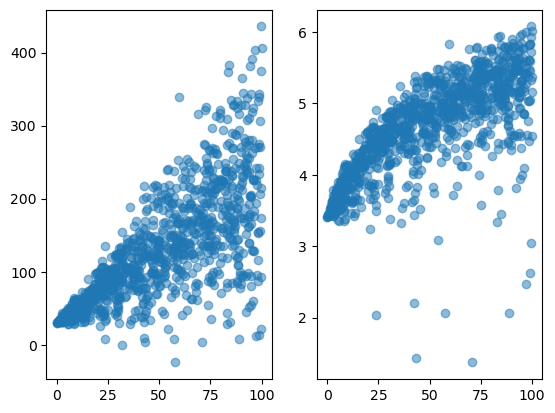

In [ ]:
plt.subplot(1,2,1)
plt.scatter(x, y, alpha=0.5)

plt.subplot(1,2,2)
plt.scatter(x, y_log, alpha=0.5)
plt.show()

### Welch t-test

In [ ]:
import time

import numpy as np
from scipy.stats import t

n1 = n2 = 100

append_direct_time = []
for _ in range(n2):
    start = time.time()
    num_list = []
    for i in range(10000):
        num_list.append(i)
    end = time.time()
    append_direct_time.append(end-start)

append_assign_time = []
for _ in range(n1):
    start = time.time()
    num_list = []
    list_append = num_list.append
    for i in range(10000):
        list_append(i)
    end = time.time()
    append_assign_time.append(end-start)


X_bar1 = np.mean(append_direct_time)
X_bar2 = np.mean(append_assign_time)
sigma1 = np.std(append_direct_time, ddof=1)
sigma2 = np.std(append_assign_time, ddof=1)

s_delta = np.sqrt( ((sigma1**2)/n1) + ((sigma2**2)/n2))
df = (s_delta**4) / ( ( (sigma1**4) / ((n1**2)*(n1-1)) ) + ( (sigma2**4) / ((n2**2)*(n2-1)) ) )

T = (X_bar1 - X_bar2) / s_delta
p_value = t.cdf(-abs(T), df) * 2
print(f"T statistics: {T:.30f}")
print(f"P-value: {p_value:.4f}")

T statistics: -1.785651882257479394766619407164
P-value: 0.0767


In [ ]:
from scipy import stats

In [ ]:
stats.ttest_ind(append_direct_time, append_assign_time, equal_var=True)

Ttest_indResult(statistic=-1.7856518822574794, pvalue=0.07568615514525469)

In [ ]:
stats.ttest_ind(append_direct_time, append_assign_time, equal_var=False)

Ttest_indResult(statistic=-1.7856518822574794, pvalue=0.07671810418774955)

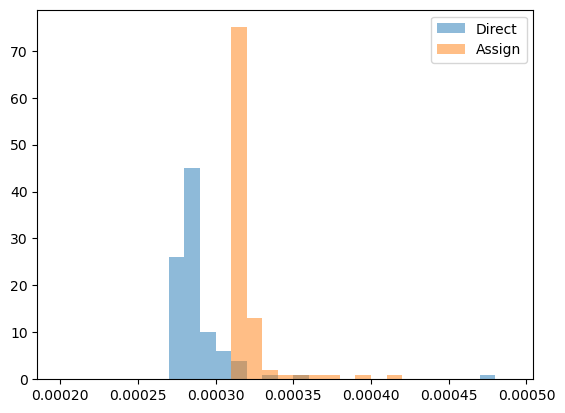

In [ ]:
## 시각화
import matplotlib.pyplot as plt

bins = np.arange(0.0002, 0.0005, 0.00001)
plt.hist(append_direct_time, bins=bins, alpha=0.5)
plt.hist(append_assign_time, bins=bins, alpha=0.5)
plt.legend(["Direct", "Assign"])
plt.show()

### Indenpendency

DW test statistic without dot: 0.0030
DW test statistic with dot: 0.0006


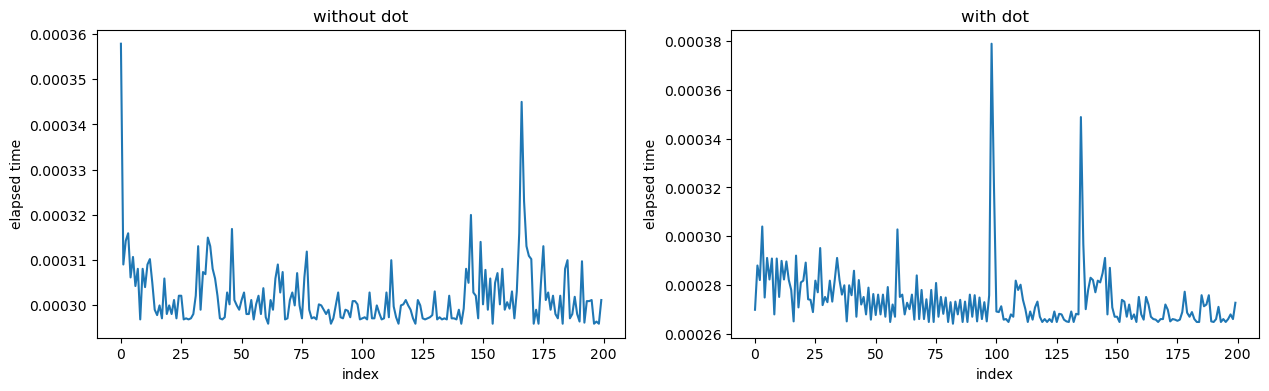

In [ ]:
import time

import numpy as np
from statsmodels.stats.stattools import durbin_watson
import matplotlib.pyplot as plt

n1 = n2 = 200

append_direct_time = []
for _ in range(n2):
    start = time.time()
    num_list = []
    for i in range(10000):
        num_list.append(i)
    end = time.time()
    append_direct_time.append(end-start)

append_assign_time = []
for _ in range(n1):
    start = time.time()
    num_list = []
    list_append = num_list.append
    for i in range(10000):
        list_append(i)
    end = time.time()
    append_assign_time.append(end-start)

dw_stats_assign = durbin_watson(append_assign_time)
dw_stats_direct = durbin_watson(append_direct_time)

print(f"DW test statistic without dot: {dw_stats_direct:.4f}")
print(f"DW test statistic with dot: {dw_stats_assign:.4f}")

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(append_assign_time)
plt.title('without dot')
plt.xlabel('index')
plt.ylabel('elapsed time')

plt.subplot(1,2,2)
plt.plot(append_direct_time)
plt.title('with dot')
plt.xlabel('index')
plt.ylabel('elapsed time')
plt.show()

### Anova

In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats

log_date = ['19-02-01', '19-02-02', '19-02-03', '19-02-04', '19-02-05', '19-02-06', '19-02-07', '19-02-08', '19-02-09', '19-02-10', '19-02-11', '19-02-12', '19-02-13', '19-02-14', '19-02-15', '19-02-16', '19-02-17', '19-02-18', '19-02-19', '19-02-20', '19-02-21', '19-02-22', '19-02-23', '19-02-24', '19-02-25', '19-02-26', '19-02-27', '19-02-28', '19-03-01', '19-03-02', '19-03-03', '19-03-04', '19-03-05', '19-03-06', '19-03-07', '19-03-08', '19-03-09', '19-03-10', '19-03-11', '19-03-12', '19-03-13', '19-03-14', '19-03-15', '19-03-16', '19-03-17', '19-03-18', '19-03-19', '19-03-20', '19-03-21', '19-03-22', '19-03-23', '19-03-24', '19-03-25', '19-03-26', '19-03-27', '19-03-28', '19-03-29', '19-03-30', '19-03-31', '19-04-01', '19-04-02', '19-04-03', '19-04-04', '19-04-05', '19-04-06', '19-04-07', '19-04-08', '19-04-09', '19-04-10', '19-04-11', '19-04-12', '19-04-13', '19-04-14', '19-04-15', '19-04-16', '19-04-17', '19-04-18', '19-04-19', '19-04-20', '19-04-21', '19-04-22', '19-04-23', '19-04-24', '19-04-25', '19-04-26', '19-04-27', '19-04-28', '19-04-29', '19-04-30', '19-05-01', '19-05-02', '19-05-03', '19-05-04', '19-05-05', '19-05-06', '19-05-07', '19-05-08', '19-05-09', '19-05-10', '19-05-11', '19-05-12', '19-05-13', '19-05-14', '19-05-15', '19-05-16', '19-05-17', '19-05-18', '19-05-19', '19-05-20', '19-05-21', '19-05-22', '19-05-23', '19-05-24', '19-05-25', '19-05-26', '19-05-27', '19-05-28', '19-05-29', '19-05-30', '19-05-31', '19-06-01', '19-06-02', '19-06-03', '19-06-04', '19-06-05', '19-06-06', '19-06-07', '19-06-08', '19-06-09', '19-06-10', '19-06-11', '19-06-12', '19-06-13', '19-06-14', '19-06-15', '19-06-16', '19-06-17', '19-06-18', '19-06-19', '19-06-20', '19-06-21', '19-06-22', '19-06-23', '19-06-24', '19-06-25', '19-06-26', '19-06-27', '19-06-28', '19-06-29', '19-06-30', '19-07-01', '19-07-02', '19-07-03', '19-07-04', '19-07-05', '19-07-06', '19-07-07', '19-07-08', '19-07-09', '19-07-10', '19-07-11', '19-07-12', '19-07-13', '19-07-14', '19-07-15', '19-07-16', '19-07-17', '19-07-18', '19-07-19', '19-07-20', '19-07-21', '19-07-22', '19-07-23', '19-07-24', '19-07-25', '19-07-26', '19-07-27', '19-07-28', '19-07-29', '19-07-30', '19-07-31', '19-08-01', '19-08-02', '19-08-03', '19-08-04', '19-08-05', '19-08-06', '19-08-07', '19-08-08', '19-08-09', '19-08-10', '19-08-11', '19-08-12', '19-08-13', '19-08-14', '19-08-15', '19-08-16', '19-08-17', '19-08-18', '19-08-19', '19-08-20', '19-08-21', '19-08-22', '19-08-23', '19-08-24', '19-08-25', '19-08-26', '19-08-27', '19-08-28', '19-08-29', '19-08-30', '19-08-31', '19-09-01', '19-09-02', '19-09-03', '19-09-04', '19-09-05', '19-09-06', '19-09-07', '19-09-08', '19-09-09', '19-09-10', '19-09-11', '19-09-12', '19-09-13', '19-09-14', '19-09-15', '19-09-16', '19-09-17', '19-09-18', '19-09-19', '19-09-20', '19-09-21', '19-09-22', '19-09-23', '19-09-24', '19-09-25', '19-09-26', '19-09-27', '19-09-28', '19-09-29', '19-09-30', '19-10-01', '19-10-02', '19-10-03', '19-10-04', '19-10-05', '19-10-06', '19-10-07', '19-10-08', '19-10-09', '19-10-10', '19-10-11', '19-10-12', '19-10-13', '19-10-14', '19-10-15', '19-10-16', '19-10-17', '19-10-18', '19-10-19', '19-10-20', '19-10-21', '19-10-22', '19-10-23', '19-10-24', '19-10-25', '19-10-26', '19-10-27', '19-10-28', '19-10-29', '19-10-30', '19-10-31', '19-11-01', '19-11-02', '19-11-03', '19-11-04', '19-11-05', '19-11-06', '19-11-07', '19-11-08', '19-11-09', '19-11-10', '19-11-11', '19-11-12', '19-11-13', '19-11-14', '19-11-15', '19-11-16', '19-11-17', '19-11-18', '19-11-19', '19-11-20', '19-11-21', '19-11-22', '19-11-23', '19-11-24', '19-11-25', '19-11-26', '19-11-27', '19-11-28', '19-11-29', '19-11-30', '19-12-01', '19-12-02', '19-12-03', '19-12-04', '19-12-05', '19-12-06', '19-12-07', '19-12-08', '19-12-09', '19-12-10', '19-12-11', '19-12-12', '19-12-13', '19-12-14', '19-12-15', '19-12-16', '19-12-17', '19-12-18', '19-12-19', '19-12-20', '19-12-21', '19-12-22', '19-12-23', '19-12-24', '19-12-25', '19-12-26', '19-12-27', '19-12-28', '19-12-29', '19-12-30', '19-12-31', '20-01-01', '20-01-02', '20-01-03', '20-01-04', '20-01-05', '20-01-06', '20-01-07', '20-01-08', '20-01-09', '20-01-10', '20-01-11', '20-01-12', '20-01-13', '20-01-14']
push_count = [736729, 511067, 528724, 709256, 740087, 828340, 855820, 876558, 711352, 726738, 933373, 959901, 964590, 910286, 848699, 628103, 660322, 895603, 953629, 949635, 955522, 917177, 659269, 701236, 975518, 1015931, 975017, 958305, 877648, 651934, 691516, 953642, 960052, 956920, 948127, 871289, 655612, 693005, 958071, 968218, 913213, 981776, 908980, 639149, 674015, 973138, 1015747, 1030862, 987880, 940083, 680284, 732752, 985210, 1015158, 988336, 960122, 923610, 657774, 698977, 942929, 1011466, 1024102, 1023094, 896419, 644560, 709638, 1019979, 944757, 1032029, 1016603, 944749, 691124, 719655, 960241, 1004906, 962822, 928066, 822771, 637555, 634379, 869363, 1007129, 997962, 987342, 920902, 655932, 720557, 950336, 986033, 846924, 932629, 869605, 655596, 731643, 945787, 973691, 845210, 956187, 919024, 646186, 666480, 944651, 998339, 989321, 979288, 904402, 635748, 670781, 937562, 986783, 969340, 960897, 879943, 615473, 635104, 863598, 970739, 924637, 942743, 908637, 641700, 664349, 941040, 980994, 969237, 968088, 855144, 607374, 643368, 921310, 987912, 985706, 981966, 876784, 598649, 624435, 918547, 947202, 938357, 912571, 861004, 601985, 644669, 914440, 956819, 945094, 928392, 837200, 579043, 592809, 881688, 920703, 910181, 819783, 788902, 598114, 613398, 915404, 960277, 938893, 964279, 890375, 603932, 630452, 925569, 959798, 958867, 940762, 899965, 615995, 638225, 922097, 969853, 933142, 898382, 852293, 600428, 663577, 969388, 1017800, 1009288, 987829, 915535, 643060, 659166, 954540, 982357, 978924, 955222, 893207, 640980, 643640, 918449, 958142, 971452, 881092, 885573, 651344, 716221, 980444, 986368, 1008115, 975142, 899282, 638546, 657839, 929137, 1010382, 1046002, 1020406, 921973, 650116, 683948, 893356, 970513, 1002060, 977504, 922181, 661898, 691059, 975349, 1011351, 991193, 286155, 660287, 668692, 697019, 997987, 1035935, 1030658, 1008518, 929352, 679834, 722942, 1012245, 981957, 1049101, 1034349, 965986, 706483, 745323, 994475, 959377, 960125, 963577, 927708, 698380, 730718, 981909, 1014043, 1009630, 959940, 958999, 738410, 731280, 1007130, 1045559, 1000966, 1008689, 961439, 724469, 764181, 1035013, 1085947, 1074606, 1008383, 959324, 700488, 728405, 1013830, 1003101, 925538, 954690, 909302, 685143, 718614, 1009602, 1027008, 1089694, 1075847, 1002722, 722901, 734530, 1026837, 1103263, 1085672, 1065596, 993674, 716144, 761068, 1037372, 1086351, 1067002, 1073715, 986711, 705113, 736264, 1072204, 1104737, 1055793, 954867, 859767, 691890, 765436, 1087212, 1135921, 1121567, 1109582, 1022900, 730604, 766976, 1084186, 1112616, 1101107, 1061678, 961088, 720602, 746224, 1029784, 1058494, 1029029, 999443, 913832, 640958, 648001, 823771, 720936, 597513, 717881, 731723, 620329, 627507, 792344, 693257, 570350, 854673, 879764, 703290, 727426, 945107, 1003707, 1028428, 1045746, 1000151, 729593, 748161, 1034195, 1067085]

df = pd.DataFrame({'log_date':log_date, 'push_count':push_count})
df.log_date = pd.to_datetime(df.log_date, format='%y-%m-%d')
df = df.assign(day_of_week = df.log_date.dt.dayofweek)

F, p_value = stats.f_oneway(*[group.push_count for dow, group in df.groupby('day_of_week')])
print(f"F statistics: {F:.4f}")
print(f"P-value: {p_value:.4f}")

F statistics: 147.9476
P-value: 0.0000


In [ ]:
df.groupby("day_of_week").push_count.median().sort_index()

day_of_week
0    954091.0
1    987347.5
2    985706.0
3    963577.0
4    906519.5
5    653765.0
6    695012.0
Name: push_count, dtype: float64

In [ ]:
df.groupby("day_of_week").push_count.mean().sort_index()

day_of_week
0    955284.360000
1    987446.620000
2    971072.448980
3    952641.510204
4    897827.440000
5    657864.100000
6    689255.040000
Name: push_count, dtype: float64

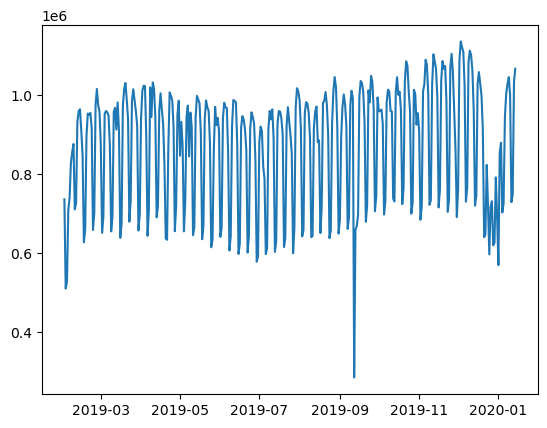

In [ ]:
plt.plot(df.log_date, df.push_count)

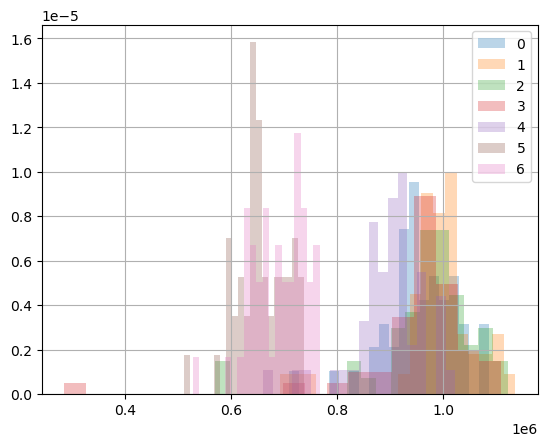

In [ ]:
leg = []
for dow, group in df.groupby("day_of_week"):
    leg.append(dow)
    group.push_count.hist(alpha=0.3, bins=20, density=True)
plt.legend(leg)
plt.show()

### ANOVA in detail

In [ ]:
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import f


log_date = ['19-02-01', '19-02-02', '19-02-03', '19-02-04', '19-02-05', '19-02-06', '19-02-07', '19-02-08', '19-02-09', '19-02-10', '19-02-11', '19-02-12', '19-02-13', '19-02-14', '19-02-15', '19-02-16', '19-02-17', '19-02-18', '19-02-19', '19-02-20', '19-02-21', '19-02-22', '19-02-23', '19-02-24', '19-02-25', '19-02-26', '19-02-27', '19-02-28', '19-03-01', '19-03-02', '19-03-03', '19-03-04', '19-03-05', '19-03-06', '19-03-07', '19-03-08', '19-03-09', '19-03-10', '19-03-11', '19-03-12', '19-03-13', '19-03-14', '19-03-15', '19-03-16', '19-03-17', '19-03-18', '19-03-19', '19-03-20', '19-03-21', '19-03-22', '19-03-23', '19-03-24', '19-03-25', '19-03-26', '19-03-27', '19-03-28', '19-03-29', '19-03-30', '19-03-31', '19-04-01', '19-04-02', '19-04-03', '19-04-04', '19-04-05', '19-04-06', '19-04-07', '19-04-08', '19-04-09', '19-04-10', '19-04-11', '19-04-12', '19-04-13', '19-04-14', '19-04-15', '19-04-16', '19-04-17', '19-04-18', '19-04-19', '19-04-20', '19-04-21', '19-04-22', '19-04-23', '19-04-24', '19-04-25', '19-04-26', '19-04-27', '19-04-28', '19-04-29', '19-04-30', '19-05-01', '19-05-02', '19-05-03', '19-05-04', '19-05-05', '19-05-06', '19-05-07', '19-05-08', '19-05-09', '19-05-10', '19-05-11', '19-05-12', '19-05-13', '19-05-14', '19-05-15', '19-05-16', '19-05-17', '19-05-18', '19-05-19', '19-05-20', '19-05-21', '19-05-22', '19-05-23', '19-05-24', '19-05-25', '19-05-26', '19-05-27', '19-05-28', '19-05-29', '19-05-30', '19-05-31', '19-06-01', '19-06-02', '19-06-03', '19-06-04', '19-06-05', '19-06-06', '19-06-07', '19-06-08', '19-06-09', '19-06-10', '19-06-11', '19-06-12', '19-06-13', '19-06-14', '19-06-15', '19-06-16', '19-06-17', '19-06-18', '19-06-19', '19-06-20', '19-06-21', '19-06-22', '19-06-23', '19-06-24', '19-06-25', '19-06-26', '19-06-27', '19-06-28', '19-06-29', '19-06-30', '19-07-01', '19-07-02', '19-07-03', '19-07-04', '19-07-05', '19-07-06', '19-07-07', '19-07-08', '19-07-09', '19-07-10', '19-07-11', '19-07-12', '19-07-13', '19-07-14', '19-07-15', '19-07-16', '19-07-17', '19-07-18', '19-07-19', '19-07-20', '19-07-21', '19-07-22', '19-07-23', '19-07-24', '19-07-25', '19-07-26', '19-07-27', '19-07-28', '19-07-29', '19-07-30', '19-07-31', '19-08-01', '19-08-02', '19-08-03', '19-08-04', '19-08-05', '19-08-06', '19-08-07', '19-08-08', '19-08-09', '19-08-10', '19-08-11', '19-08-12', '19-08-13', '19-08-14', '19-08-15', '19-08-16', '19-08-17', '19-08-18', '19-08-19', '19-08-20', '19-08-21', '19-08-22', '19-08-23', '19-08-24', '19-08-25', '19-08-26', '19-08-27', '19-08-28', '19-08-29', '19-08-30', '19-08-31', '19-09-01', '19-09-02', '19-09-03', '19-09-04', '19-09-05', '19-09-06', '19-09-07', '19-09-08', '19-09-09', '19-09-10', '19-09-11', '19-09-12', '19-09-13', '19-09-14', '19-09-15', '19-09-16', '19-09-17', '19-09-18', '19-09-19', '19-09-20', '19-09-21', '19-09-22', '19-09-23', '19-09-24', '19-09-25', '19-09-26', '19-09-27', '19-09-28', '19-09-29', '19-09-30', '19-10-01', '19-10-02', '19-10-03', '19-10-04', '19-10-05', '19-10-06', '19-10-07', '19-10-08', '19-10-09', '19-10-10', '19-10-11', '19-10-12', '19-10-13', '19-10-14', '19-10-15', '19-10-16', '19-10-17', '19-10-18', '19-10-19', '19-10-20', '19-10-21', '19-10-22', '19-10-23', '19-10-24', '19-10-25', '19-10-26', '19-10-27', '19-10-28', '19-10-29', '19-10-30', '19-10-31', '19-11-01', '19-11-02', '19-11-03', '19-11-04', '19-11-05', '19-11-06', '19-11-07', '19-11-08', '19-11-09', '19-11-10', '19-11-11', '19-11-12', '19-11-13', '19-11-14', '19-11-15', '19-11-16', '19-11-17', '19-11-18', '19-11-19', '19-11-20', '19-11-21', '19-11-22', '19-11-23', '19-11-24', '19-11-25', '19-11-26', '19-11-27', '19-11-28', '19-11-29', '19-11-30', '19-12-01', '19-12-02', '19-12-03', '19-12-04', '19-12-05', '19-12-06', '19-12-07', '19-12-08', '19-12-09', '19-12-10', '19-12-11', '19-12-12', '19-12-13', '19-12-14', '19-12-15', '19-12-16', '19-12-17', '19-12-18', '19-12-19', '19-12-20', '19-12-21', '19-12-22', '19-12-23', '19-12-24', '19-12-25', '19-12-26', '19-12-27', '19-12-28', '19-12-29', '19-12-30', '19-12-31', '20-01-01', '20-01-02', '20-01-03', '20-01-04', '20-01-05', '20-01-06', '20-01-07', '20-01-08', '20-01-09', '20-01-10', '20-01-11', '20-01-12', '20-01-13', '20-01-14']
push_count = [736729, 511067, 528724, 709256, 740087, 828340, 855820, 876558, 711352, 726738, 933373, 959901, 964590, 910286, 848699, 628103, 660322, 895603, 953629, 949635, 955522, 917177, 659269, 701236, 975518, 1015931, 975017, 958305, 877648, 651934, 691516, 953642, 960052, 956920, 948127, 871289, 655612, 693005, 958071, 968218, 913213, 981776, 908980, 639149, 674015, 973138, 1015747, 1030862, 987880, 940083, 680284, 732752, 985210, 1015158, 988336, 960122, 923610, 657774, 698977, 942929, 1011466, 1024102, 1023094, 896419, 644560, 709638, 1019979, 944757, 1032029, 1016603, 944749, 691124, 719655, 960241, 1004906, 962822, 928066, 822771, 637555, 634379, 869363, 1007129, 997962, 987342, 920902, 655932, 720557, 950336, 986033, 846924, 932629, 869605, 655596, 731643, 945787, 973691, 845210, 956187, 919024, 646186, 666480, 944651, 998339, 989321, 979288, 904402, 635748, 670781, 937562, 986783, 969340, 960897, 879943, 615473, 635104, 863598, 970739, 924637, 942743, 908637, 641700, 664349, 941040, 980994, 969237, 968088, 855144, 607374, 643368, 921310, 987912, 985706, 981966, 876784, 598649, 624435, 918547, 947202, 938357, 912571, 861004, 601985, 644669, 914440, 956819, 945094, 928392, 837200, 579043, 592809, 881688, 920703, 910181, 819783, 788902, 598114, 613398, 915404, 960277, 938893, 964279, 890375, 603932, 630452, 925569, 959798, 958867, 940762, 899965, 615995, 638225, 922097, 969853, 933142, 898382, 852293, 600428, 663577, 969388, 1017800, 1009288, 987829, 915535, 643060, 659166, 954540, 982357, 978924, 955222, 893207, 640980, 643640, 918449, 958142, 971452, 881092, 885573, 651344, 716221, 980444, 986368, 1008115, 975142, 899282, 638546, 657839, 929137, 1010382, 1046002, 1020406, 921973, 650116, 683948, 893356, 970513, 1002060, 977504, 922181, 661898, 691059, 975349, 1011351, 991193, 286155, 660287, 668692, 697019, 997987, 1035935, 1030658, 1008518, 929352, 679834, 722942, 1012245, 981957, 1049101, 1034349, 965986, 706483, 745323, 994475, 959377, 960125, 963577, 927708, 698380, 730718, 981909, 1014043, 1009630, 959940, 958999, 738410, 731280, 1007130, 1045559, 1000966, 1008689, 961439, 724469, 764181, 1035013, 1085947, 1074606, 1008383, 959324, 700488, 728405, 1013830, 1003101, 925538, 954690, 909302, 685143, 718614, 1009602, 1027008, 1089694, 1075847, 1002722, 722901, 734530, 1026837, 1103263, 1085672, 1065596, 993674, 716144, 761068, 1037372, 1086351, 1067002, 1073715, 986711, 705113, 736264, 1072204, 1104737, 1055793, 954867, 859767, 691890, 765436, 1087212, 1135921, 1121567, 1109582, 1022900, 730604, 766976, 1084186, 1112616, 1101107, 1061678, 961088, 720602, 746224, 1029784, 1058494, 1029029, 999443, 913832, 640958, 648001, 823771, 720936, 597513, 717881, 731723, 620329, 627507, 792344, 693257, 570350, 854673, 879764, 703290, 727426, 945107, 1003707, 1028428, 1045746, 1000151, 729593, 748161, 1034195, 1067085]

df = pd.DataFrame({'log_date':log_date, 'push_count':push_count})
df.log_date = pd.to_datetime(df.log_date, format='%y-%m-%d')
df = df.assign(day_of_week = df.log_date.dt.dayofweek)

SS_total = (np.square(df.push_count - df.push_count.mean())).sum()
SS_error = np.sum([(np.square(group.push_count - group.push_count.mean())).sum() for dow, group in df.groupby('day_of_week')])
SS_treat = (np.square(df.groupby('day_of_week').push_count.mean() - df.push_count.mean()) * df.groupby('day_of_week').size()).sum()

assert abs(SS_total - (SS_error + SS_treat)) < 1

n = len(df)
k = df.day_of_week.nunique()
MSE = SS_error / (n - k)
MST = SS_treat / (k - 1)

F = MST / MSE

p_value = 1 - f.cdf(F, k-1, n-k)

print(f"F statistics: {F:.4f}")
print(f"P-value: {p_value:.4f}")

F statistics: 147.9476
P-value: 0.0000


### Assumption test

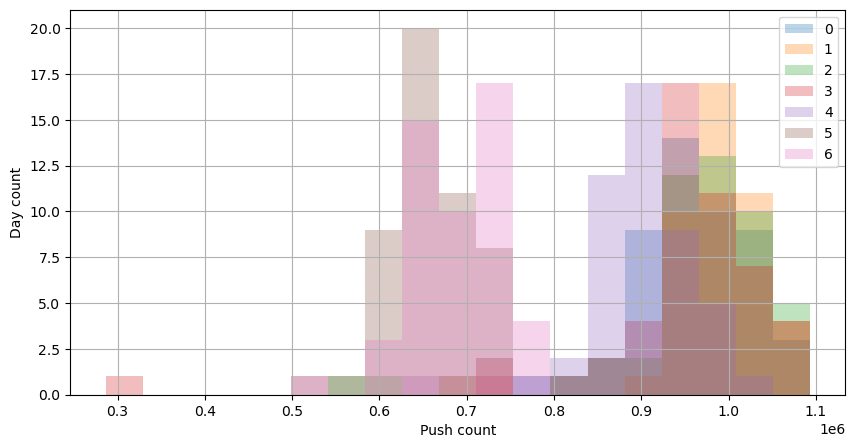

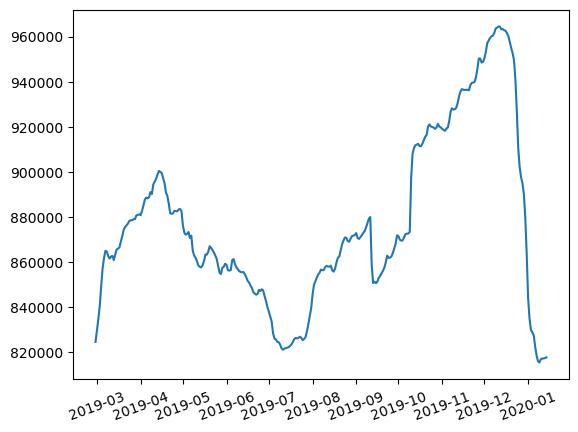

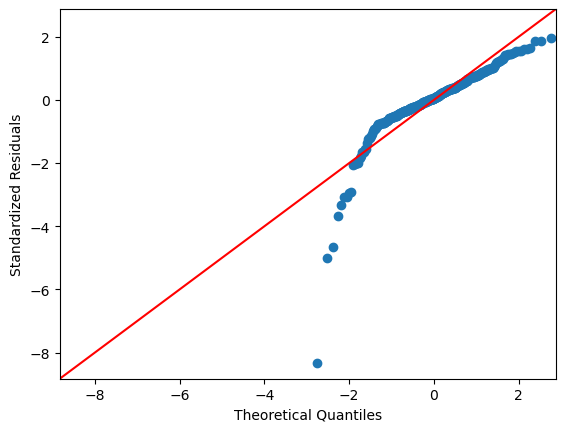

Normaility test p-value: 0.0000
Equal variance test p-value: 0.0000
Independence test statistic: 0.5847


In [ ]:
import time

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson

log_date = ['19-02-01', '19-02-02', '19-02-03', '19-02-04', '19-02-05', '19-02-06', '19-02-07', '19-02-08', '19-02-09', '19-02-10', '19-02-11', '19-02-12', '19-02-13', '19-02-14', '19-02-15', '19-02-16', '19-02-17', '19-02-18', '19-02-19', '19-02-20', '19-02-21', '19-02-22', '19-02-23', '19-02-24', '19-02-25', '19-02-26', '19-02-27', '19-02-28', '19-03-01', '19-03-02', '19-03-03', '19-03-04', '19-03-05', '19-03-06', '19-03-07', '19-03-08', '19-03-09', '19-03-10', '19-03-11', '19-03-12', '19-03-13', '19-03-14', '19-03-15', '19-03-16', '19-03-17', '19-03-18', '19-03-19', '19-03-20', '19-03-21', '19-03-22', '19-03-23', '19-03-24', '19-03-25', '19-03-26', '19-03-27', '19-03-28', '19-03-29', '19-03-30', '19-03-31', '19-04-01', '19-04-02', '19-04-03', '19-04-04', '19-04-05', '19-04-06', '19-04-07', '19-04-08', '19-04-09', '19-04-10', '19-04-11', '19-04-12', '19-04-13', '19-04-14', '19-04-15', '19-04-16', '19-04-17', '19-04-18', '19-04-19', '19-04-20', '19-04-21', '19-04-22', '19-04-23', '19-04-24', '19-04-25', '19-04-26', '19-04-27', '19-04-28', '19-04-29', '19-04-30', '19-05-01', '19-05-02', '19-05-03', '19-05-04', '19-05-05', '19-05-06', '19-05-07', '19-05-08', '19-05-09', '19-05-10', '19-05-11', '19-05-12', '19-05-13', '19-05-14', '19-05-15', '19-05-16', '19-05-17', '19-05-18', '19-05-19', '19-05-20', '19-05-21', '19-05-22', '19-05-23', '19-05-24', '19-05-25', '19-05-26', '19-05-27', '19-05-28', '19-05-29', '19-05-30', '19-05-31', '19-06-01', '19-06-02', '19-06-03', '19-06-04', '19-06-05', '19-06-06', '19-06-07', '19-06-08', '19-06-09', '19-06-10', '19-06-11', '19-06-12', '19-06-13', '19-06-14', '19-06-15', '19-06-16', '19-06-17', '19-06-18', '19-06-19', '19-06-20', '19-06-21', '19-06-22', '19-06-23', '19-06-24', '19-06-25', '19-06-26', '19-06-27', '19-06-28', '19-06-29', '19-06-30', '19-07-01', '19-07-02', '19-07-03', '19-07-04', '19-07-05', '19-07-06', '19-07-07', '19-07-08', '19-07-09', '19-07-10', '19-07-11', '19-07-12', '19-07-13', '19-07-14', '19-07-15', '19-07-16', '19-07-17', '19-07-18', '19-07-19', '19-07-20', '19-07-21', '19-07-22', '19-07-23', '19-07-24', '19-07-25', '19-07-26', '19-07-27', '19-07-28', '19-07-29', '19-07-30', '19-07-31', '19-08-01', '19-08-02', '19-08-03', '19-08-04', '19-08-05', '19-08-06', '19-08-07', '19-08-08', '19-08-09', '19-08-10', '19-08-11', '19-08-12', '19-08-13', '19-08-14', '19-08-15', '19-08-16', '19-08-17', '19-08-18', '19-08-19', '19-08-20', '19-08-21', '19-08-22', '19-08-23', '19-08-24', '19-08-25', '19-08-26', '19-08-27', '19-08-28', '19-08-29', '19-08-30', '19-08-31', '19-09-01', '19-09-02', '19-09-03', '19-09-04', '19-09-05', '19-09-06', '19-09-07', '19-09-08', '19-09-09', '19-09-10', '19-09-11', '19-09-12', '19-09-13', '19-09-14', '19-09-15', '19-09-16', '19-09-17', '19-09-18', '19-09-19', '19-09-20', '19-09-21', '19-09-22', '19-09-23', '19-09-24', '19-09-25', '19-09-26', '19-09-27', '19-09-28', '19-09-29', '19-09-30', '19-10-01', '19-10-02', '19-10-03', '19-10-04', '19-10-05', '19-10-06', '19-10-07', '19-10-08', '19-10-09', '19-10-10', '19-10-11', '19-10-12', '19-10-13', '19-10-14', '19-10-15', '19-10-16', '19-10-17', '19-10-18', '19-10-19', '19-10-20', '19-10-21', '19-10-22', '19-10-23', '19-10-24', '19-10-25', '19-10-26', '19-10-27', '19-10-28', '19-10-29', '19-10-30', '19-10-31', '19-11-01', '19-11-02', '19-11-03', '19-11-04', '19-11-05', '19-11-06', '19-11-07', '19-11-08', '19-11-09', '19-11-10', '19-11-11', '19-11-12', '19-11-13', '19-11-14', '19-11-15', '19-11-16', '19-11-17', '19-11-18', '19-11-19', '19-11-20', '19-11-21', '19-11-22', '19-11-23', '19-11-24', '19-11-25', '19-11-26', '19-11-27', '19-11-28', '19-11-29', '19-11-30', '19-12-01', '19-12-02', '19-12-03', '19-12-04', '19-12-05', '19-12-06', '19-12-07', '19-12-08', '19-12-09', '19-12-10', '19-12-11', '19-12-12', '19-12-13', '19-12-14', '19-12-15', '19-12-16', '19-12-17', '19-12-18', '19-12-19', '19-12-20', '19-12-21', '19-12-22', '19-12-23', '19-12-24', '19-12-25', '19-12-26', '19-12-27', '19-12-28', '19-12-29', '19-12-30', '19-12-31', '20-01-01', '20-01-02', '20-01-03', '20-01-04', '20-01-05', '20-01-06', '20-01-07', '20-01-08', '20-01-09', '20-01-10', '20-01-11', '20-01-12', '20-01-13', '20-01-14']
push_count = [736729, 511067, 528724, 709256, 740087, 828340, 855820, 876558, 711352, 726738, 933373, 959901, 964590, 910286, 848699, 628103, 660322, 895603, 953629, 949635, 955522, 917177, 659269, 701236, 975518, 1015931, 975017, 958305, 877648, 651934, 691516, 953642, 960052, 956920, 948127, 871289, 655612, 693005, 958071, 968218, 913213, 981776, 908980, 639149, 674015, 973138, 1015747, 1030862, 987880, 940083, 680284, 732752, 985210, 1015158, 988336, 960122, 923610, 657774, 698977, 942929, 1011466, 1024102, 1023094, 896419, 644560, 709638, 1019979, 944757, 1032029, 1016603, 944749, 691124, 719655, 960241, 1004906, 962822, 928066, 822771, 637555, 634379, 869363, 1007129, 997962, 987342, 920902, 655932, 720557, 950336, 986033, 846924, 932629, 869605, 655596, 731643, 945787, 973691, 845210, 956187, 919024, 646186, 666480, 944651, 998339, 989321, 979288, 904402, 635748, 670781, 937562, 986783, 969340, 960897, 879943, 615473, 635104, 863598, 970739, 924637, 942743, 908637, 641700, 664349, 941040, 980994, 969237, 968088, 855144, 607374, 643368, 921310, 987912, 985706, 981966, 876784, 598649, 624435, 918547, 947202, 938357, 912571, 861004, 601985, 644669, 914440, 956819, 945094, 928392, 837200, 579043, 592809, 881688, 920703, 910181, 819783, 788902, 598114, 613398, 915404, 960277, 938893, 964279, 890375, 603932, 630452, 925569, 959798, 958867, 940762, 899965, 615995, 638225, 922097, 969853, 933142, 898382, 852293, 600428, 663577, 969388, 1017800, 1009288, 987829, 915535, 643060, 659166, 954540, 982357, 978924, 955222, 893207, 640980, 643640, 918449, 958142, 971452, 881092, 885573, 651344, 716221, 980444, 986368, 1008115, 975142, 899282, 638546, 657839, 929137, 1010382, 1046002, 1020406, 921973, 650116, 683948, 893356, 970513, 1002060, 977504, 922181, 661898, 691059, 975349, 1011351, 991193, 286155, 660287, 668692, 697019, 997987, 1035935, 1030658, 1008518, 929352, 679834, 722942, 1012245, 981957, 1049101, 1034349, 965986, 706483, 745323, 994475, 959377, 960125, 963577, 927708, 698380, 730718, 981909, 1014043, 1009630, 959940, 958999, 738410, 731280, 1007130, 1045559, 1000966, 1008689, 961439, 724469, 764181, 1035013, 1085947, 1074606, 1008383, 959324, 700488, 728405, 1013830, 1003101, 925538, 954690, 909302, 685143, 718614, 1009602, 1027008, 1089694, 1075847, 1002722, 722901, 734530, 1026837, 1103263, 1085672, 1065596, 993674, 716144, 761068, 1037372, 1086351, 1067002, 1073715, 986711, 705113, 736264, 1072204, 1104737, 1055793, 954867, 859767, 691890, 765436, 1087212, 1135921, 1121567, 1109582, 1022900, 730604, 766976, 1084186, 1112616, 1101107, 1061678, 961088, 720602, 746224, 1029784, 1058494, 1029029, 999443, 913832, 640958, 648001, 823771, 720936, 597513, 717881, 731723, 620329, 627507, 792344, 693257, 570350, 854673, 879764, 703290, 727426, 945107, 1003707, 1028428, 1045746, 1000151, 729593, 748161, 1034195, 1067085]

df = pd.DataFrame({'log_date':log_date, 'push_count':push_count})
df.log_date = pd.to_datetime(df.log_date, format='%y-%m-%d')
df = df.assign(day_of_week = df.log_date.dt.dayofweek)

x_max = df.push_count.max()
x_min = df.push_count.min()
bins = np.arange(x_min, x_max, step=(x_max-x_min)/20)

plt.figure(figsize=(10,5))
legs = []
for dow, group in df.groupby('day_of_week'):
    group.push_count.hist(bins=bins, alpha=0.3)
    legs.append(dow)

plt.legend(legs)
plt.ylabel('Day count')
plt.xlabel('Push count')
plt.show()

df['residual'] = df['push_count'] - df.groupby('day_of_week').push_count.transform('mean')
df['std_resi'] = (df['residual'] - df['residual'].mean()) / df['residual'].std()
df = df.assign(push_count_ma = df.push_count.rolling(28).mean())

# MA plot
plt.plot(df.log_date, df.push_count_ma)
plt.xticks(rotation=20)
plt.show()

# QQ plot
sm.qqplot(df['std_resi'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# normality
w, pvalue = stats.shapiro(df.residual)
print(f"Normaility test p-value: {pvalue:.4f}")

# equal variance
w, pvalue = stats.bartlett(*[group.residual for dow, group in df.groupby('day_of_week')])
print(f"Equal variance test p-value: {pvalue:.4f}")

# independency
d = durbin_watson(df.residual)
print(f"Independence test statistic: {d:.4f}")

### ANOVA Remedy

The number of z-score outliers on 0: 2
The number of z-score outliers on 1: 4
The number of z-score outliers on 2: 3
The number of z-score outliers on 3: 3
The number of z-score outliers on 4: 3
The number of z-score outliers on 5: 1
The number of z-score outliers on 6: 1
Normaility test p-value: 0.1198
Equal variance test p-value: 0.1191
Independence test statistic: 1.0552


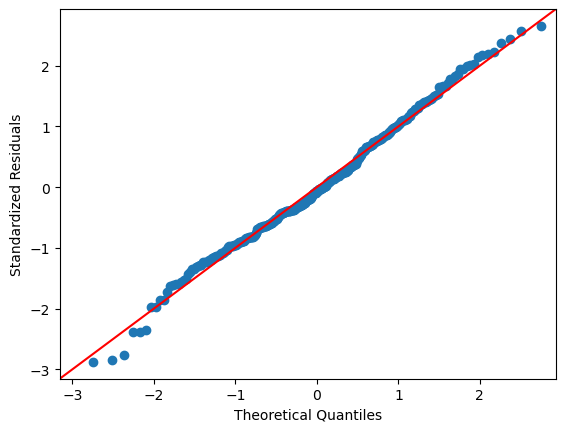

F statistics: 390.3232
P-value: 0.0000


In [ ]:
import time

import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.stattools import durbin_watson

log_date = ['19-02-01', '19-02-02', '19-02-03', '19-02-04', '19-02-05', '19-02-06', '19-02-07', '19-02-08', '19-02-09', '19-02-10', '19-02-11', '19-02-12', '19-02-13', '19-02-14', '19-02-15', '19-02-16', '19-02-17', '19-02-18', '19-02-19', '19-02-20', '19-02-21', '19-02-22', '19-02-23', '19-02-24', '19-02-25', '19-02-26', '19-02-27', '19-02-28', '19-03-01', '19-03-02', '19-03-03', '19-03-04', '19-03-05', '19-03-06', '19-03-07', '19-03-08', '19-03-09', '19-03-10', '19-03-11', '19-03-12', '19-03-13', '19-03-14', '19-03-15', '19-03-16', '19-03-17', '19-03-18', '19-03-19', '19-03-20', '19-03-21', '19-03-22', '19-03-23', '19-03-24', '19-03-25', '19-03-26', '19-03-27', '19-03-28', '19-03-29', '19-03-30', '19-03-31', '19-04-01', '19-04-02', '19-04-03', '19-04-04', '19-04-05', '19-04-06', '19-04-07', '19-04-08', '19-04-09', '19-04-10', '19-04-11', '19-04-12', '19-04-13', '19-04-14', '19-04-15', '19-04-16', '19-04-17', '19-04-18', '19-04-19', '19-04-20', '19-04-21', '19-04-22', '19-04-23', '19-04-24', '19-04-25', '19-04-26', '19-04-27', '19-04-28', '19-04-29', '19-04-30', '19-05-01', '19-05-02', '19-05-03', '19-05-04', '19-05-05', '19-05-06', '19-05-07', '19-05-08', '19-05-09', '19-05-10', '19-05-11', '19-05-12', '19-05-13', '19-05-14', '19-05-15', '19-05-16', '19-05-17', '19-05-18', '19-05-19', '19-05-20', '19-05-21', '19-05-22', '19-05-23', '19-05-24', '19-05-25', '19-05-26', '19-05-27', '19-05-28', '19-05-29', '19-05-30', '19-05-31', '19-06-01', '19-06-02', '19-06-03', '19-06-04', '19-06-05', '19-06-06', '19-06-07', '19-06-08', '19-06-09', '19-06-10', '19-06-11', '19-06-12', '19-06-13', '19-06-14', '19-06-15', '19-06-16', '19-06-17', '19-06-18', '19-06-19', '19-06-20', '19-06-21', '19-06-22', '19-06-23', '19-06-24', '19-06-25', '19-06-26', '19-06-27', '19-06-28', '19-06-29', '19-06-30', '19-07-01', '19-07-02', '19-07-03', '19-07-04', '19-07-05', '19-07-06', '19-07-07', '19-07-08', '19-07-09', '19-07-10', '19-07-11', '19-07-12', '19-07-13', '19-07-14', '19-07-15', '19-07-16', '19-07-17', '19-07-18', '19-07-19', '19-07-20', '19-07-21', '19-07-22', '19-07-23', '19-07-24', '19-07-25', '19-07-26', '19-07-27', '19-07-28', '19-07-29', '19-07-30', '19-07-31', '19-08-01', '19-08-02', '19-08-03', '19-08-04', '19-08-05', '19-08-06', '19-08-07', '19-08-08', '19-08-09', '19-08-10', '19-08-11', '19-08-12', '19-08-13', '19-08-14', '19-08-15', '19-08-16', '19-08-17', '19-08-18', '19-08-19', '19-08-20', '19-08-21', '19-08-22', '19-08-23', '19-08-24', '19-08-25', '19-08-26', '19-08-27', '19-08-28', '19-08-29', '19-08-30', '19-08-31', '19-09-01', '19-09-02', '19-09-03', '19-09-04', '19-09-05', '19-09-06', '19-09-07', '19-09-08', '19-09-09', '19-09-10', '19-09-11', '19-09-12', '19-09-13', '19-09-14', '19-09-15', '19-09-16', '19-09-17', '19-09-18', '19-09-19', '19-09-20', '19-09-21', '19-09-22', '19-09-23', '19-09-24', '19-09-25', '19-09-26', '19-09-27', '19-09-28', '19-09-29', '19-09-30', '19-10-01', '19-10-02', '19-10-03', '19-10-04', '19-10-05', '19-10-06', '19-10-07', '19-10-08', '19-10-09', '19-10-10', '19-10-11', '19-10-12', '19-10-13', '19-10-14', '19-10-15', '19-10-16', '19-10-17', '19-10-18', '19-10-19', '19-10-20', '19-10-21', '19-10-22', '19-10-23', '19-10-24', '19-10-25', '19-10-26', '19-10-27', '19-10-28', '19-10-29', '19-10-30', '19-10-31', '19-11-01', '19-11-02', '19-11-03', '19-11-04', '19-11-05', '19-11-06', '19-11-07', '19-11-08', '19-11-09', '19-11-10', '19-11-11', '19-11-12', '19-11-13', '19-11-14', '19-11-15', '19-11-16', '19-11-17', '19-11-18', '19-11-19', '19-11-20', '19-11-21', '19-11-22', '19-11-23', '19-11-24', '19-11-25', '19-11-26', '19-11-27', '19-11-28', '19-11-29', '19-11-30', '19-12-01', '19-12-02', '19-12-03', '19-12-04', '19-12-05', '19-12-06', '19-12-07', '19-12-08', '19-12-09', '19-12-10', '19-12-11', '19-12-12', '19-12-13', '19-12-14', '19-12-15', '19-12-16', '19-12-17', '19-12-18', '19-12-19', '19-12-20', '19-12-21', '19-12-22', '19-12-23', '19-12-24', '19-12-25', '19-12-26', '19-12-27', '19-12-28', '19-12-29', '19-12-30', '19-12-31', '20-01-01', '20-01-02', '20-01-03', '20-01-04', '20-01-05', '20-01-06', '20-01-07', '20-01-08', '20-01-09', '20-01-10', '20-01-11', '20-01-12', '20-01-13', '20-01-14']
push_count = [736729, 511067, 528724, 709256, 740087, 828340, 855820, 876558, 711352, 726738, 933373, 959901, 964590, 910286, 848699, 628103, 660322, 895603, 953629, 949635, 955522, 917177, 659269, 701236, 975518, 1015931, 975017, 958305, 877648, 651934, 691516, 953642, 960052, 956920, 948127, 871289, 655612, 693005, 958071, 968218, 913213, 981776, 908980, 639149, 674015, 973138, 1015747, 1030862, 987880, 940083, 680284, 732752, 985210, 1015158, 988336, 960122, 923610, 657774, 698977, 942929, 1011466, 1024102, 1023094, 896419, 644560, 709638, 1019979, 944757, 1032029, 1016603, 944749, 691124, 719655, 960241, 1004906, 962822, 928066, 822771, 637555, 634379, 869363, 1007129, 997962, 987342, 920902, 655932, 720557, 950336, 986033, 846924, 932629, 869605, 655596, 731643, 945787, 973691, 845210, 956187, 919024, 646186, 666480, 944651, 998339, 989321, 979288, 904402, 635748, 670781, 937562, 986783, 969340, 960897, 879943, 615473, 635104, 863598, 970739, 924637, 942743, 908637, 641700, 664349, 941040, 980994, 969237, 968088, 855144, 607374, 643368, 921310, 987912, 985706, 981966, 876784, 598649, 624435, 918547, 947202, 938357, 912571, 861004, 601985, 644669, 914440, 956819, 945094, 928392, 837200, 579043, 592809, 881688, 920703, 910181, 819783, 788902, 598114, 613398, 915404, 960277, 938893, 964279, 890375, 603932, 630452, 925569, 959798, 958867, 940762, 899965, 615995, 638225, 922097, 969853, 933142, 898382, 852293, 600428, 663577, 969388, 1017800, 1009288, 987829, 915535, 643060, 659166, 954540, 982357, 978924, 955222, 893207, 640980, 643640, 918449, 958142, 971452, 881092, 885573, 651344, 716221, 980444, 986368, 1008115, 975142, 899282, 638546, 657839, 929137, 1010382, 1046002, 1020406, 921973, 650116, 683948, 893356, 970513, 1002060, 977504, 922181, 661898, 691059, 975349, 1011351, 991193, 286155, 660287, 668692, 697019, 997987, 1035935, 1030658, 1008518, 929352, 679834, 722942, 1012245, 981957, 1049101, 1034349, 965986, 706483, 745323, 994475, 959377, 960125, 963577, 927708, 698380, 730718, 981909, 1014043, 1009630, 959940, 958999, 738410, 731280, 1007130, 1045559, 1000966, 1008689, 961439, 724469, 764181, 1035013, 1085947, 1074606, 1008383, 959324, 700488, 728405, 1013830, 1003101, 925538, 954690, 909302, 685143, 718614, 1009602, 1027008, 1089694, 1075847, 1002722, 722901, 734530, 1026837, 1103263, 1085672, 1065596, 993674, 716144, 761068, 1037372, 1086351, 1067002, 1073715, 986711, 705113, 736264, 1072204, 1104737, 1055793, 954867, 859767, 691890, 765436, 1087212, 1135921, 1121567, 1109582, 1022900, 730604, 766976, 1084186, 1112616, 1101107, 1061678, 961088, 720602, 746224, 1029784, 1058494, 1029029, 999443, 913832, 640958, 648001, 823771, 720936, 597513, 717881, 731723, 620329, 627507, 792344, 693257, 570350, 854673, 879764, 703290, 727426, 945107, 1003707, 1028428, 1045746, 1000151, 729593, 748161, 1034195, 1067085]

df = pd.DataFrame({'log_date':log_date, 'push_count':push_count})
df.log_date = pd.to_datetime(df.log_date, format='%y-%m-%d')
df = df.assign(day_of_week = df.log_date.dt.dayofweek)


def z_score_outlier_remover(l, dow, threshold):
    total_outlier_count = 0
    l = np.array(l)

    while True:
        m = np.mean(l)
        s = np.std(l)
        outlier_bool = np.abs(l - m) > threshold*s
        outlier_count = outlier_bool.sum()
        if outlier_count > 0:
            total_outlier_count += outlier_count
            l = l[~outlier_bool]
        else:
            if total_outlier_count > 0:
                print(f"The number of z-score outliers on {dow}: {total_outlier_count}")
                break
    return l

df_no_outlier = pd.concat([pd.DataFrame({'push_count':z_score_outlier_remover(group.push_count, dow, 2.5), 'day_of_week':dow}) for dow, group in df.groupby('day_of_week')])

df_no_outlier['residual'] = df_no_outlier['push_count'] - df_no_outlier.groupby('day_of_week').push_count.transform('mean')

# normality
w, pvalue = stats.shapiro(df_no_outlier.residual)
print(f"Normaility test p-value: {pvalue:.4f}")

# equal variance
w, pvalue = stats.bartlett(*[group.residual for dow, group in df_no_outlier.groupby('day_of_week')])
print(f"Equal variance test p-value: {pvalue:.4f}")

# independency
d = durbin_watson(df_no_outlier["residual"])
print(f"Independence test statistic: {d:.4f}")

# QQ plot
df_no_outlier['std_resi'] = (df_no_outlier['residual'] - df_no_outlier['residual'].mean()) / df_no_outlier['residual'].std()
sm.qqplot(df_no_outlier['std_resi'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# ANOVA
F, p_value = stats.f_oneway(*[group.push_count for dow, group in df_no_outlier.groupby('day_of_week')])
print(f"F statistics: {F:.4f}")
print(f"P-value: {p_value:.4f}")

In [ ]:
df_no_outlier.groupby("day_of_week").push_count.mean().sort_index().round()

day_of_week
0     963805.0
1    1001785.0
2     991008.0
3     975122.0
4     909843.0
5     660860.0
6     692531.0
Name: push_count, dtype: float64

### 평일에서도 차이가 있는지

The number of z-score outliers on 0: 2
The number of z-score outliers on 1: 4
The number of z-score outliers on 2: 3
The number of z-score outliers on 3: 3
The number of z-score outliers on 4: 3
The number of z-score outliers on 5: 1
The number of z-score outliers on 6: 1
Normaility test p-value: 0.0233
Equal variance test p-value: 0.3523
Independence test statistic: 1.1673


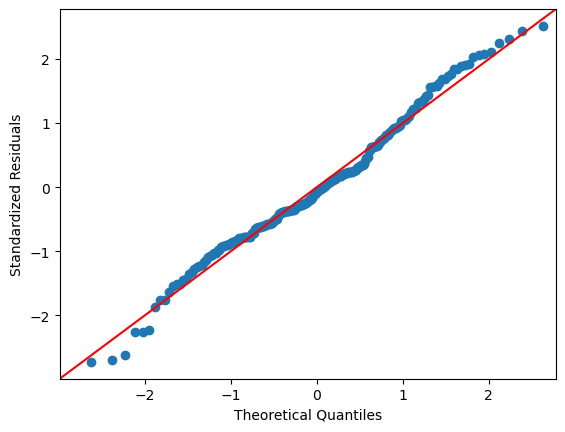

F statistics: 20.5940
P-value: 0.0000


In [ ]:
df_no_outlier = pd.concat([pd.DataFrame({'push_count':z_score_outlier_remover(group.push_count, dow, 2.5), 'day_of_week':dow}) for dow, group in df.groupby('day_of_week')])
## 월~금만 필터
df_no_outlier = df_no_outlier[df_no_outlier.day_of_week<=4]

df_no_outlier['residual'] = df_no_outlier['push_count'] - df_no_outlier.groupby('day_of_week').push_count.transform('mean')

# normality
w, pvalue = stats.shapiro(df_no_outlier.residual)
print(f"Normaility test p-value: {pvalue:.4f}")

# equal variance
w, pvalue = stats.bartlett(*[group.residual for dow, group in df_no_outlier.groupby('day_of_week')])
print(f"Equal variance test p-value: {pvalue:.4f}")

# independency
d = durbin_watson(df_no_outlier["residual"])
print(f"Independence test statistic: {d:.4f}")

# QQ plot
df_no_outlier['std_resi'] = (df_no_outlier['residual'] - df_no_outlier['residual'].mean()) / df_no_outlier['residual'].std()
sm.qqplot(df_no_outlier['std_resi'], line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

# ANOVA
F, p_value = stats.f_oneway(*[group.push_count for dow, group in df_no_outlier.groupby('day_of_week')])
print(f"F statistics: {F:.4f}")
print(f"P-value: {p_value:.4f}")

In [ ]:
## 평일 내에서도 차이가 있음
df_no_outlier.groupby("day_of_week").push_count.mean().sort_index().round()

day_of_week
0     963805.0
1    1001785.0
2     991008.0
3     975122.0
4     909843.0
Name: push_count, dtype: float64

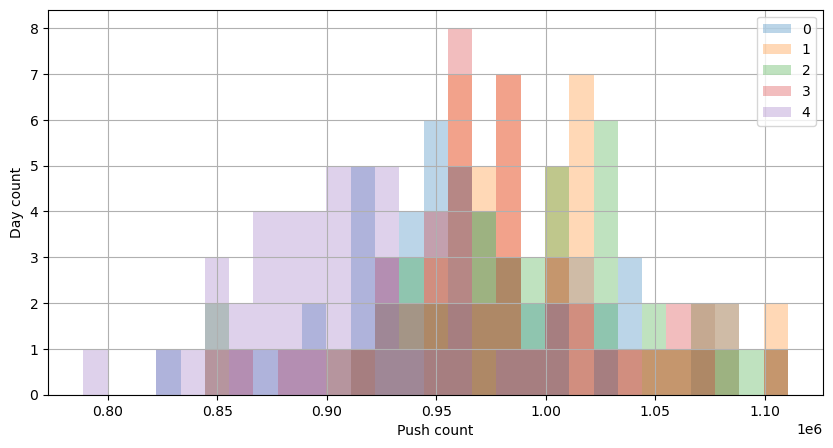

In [ ]:
def visualize_by_dayofweek(df):
    x_max = df.push_count.max()
    x_min = df.push_count.min()
    bins = np.arange(x_min, x_max, step=(x_max-x_min)/30)

    plt.figure(figsize=(10,5))
    legs = []
    for dow, group in df.groupby('day_of_week'):
        group.push_count.hist(bins=bins, alpha=0.3)
        legs.append(dow)

    plt.legend(legs)
    plt.ylabel('Day count')
    plt.xlabel('Push count')
    plt.show()

    df['residual'] = df['push_count'] - df.groupby('day_of_week').push_count.transform('mean')
    df['std_resi'] = (df['residual'] - df['residual'].mean()) / df['residual'].std()
    df = df.assign(push_count_ma = df.push_count.rolling(28).mean())

visualize_by_dayofweek(df_no_outlier)

### 카이제곱 검정

In [ ]:
from scipy.stats import chi2_contingency


data = [
    [20, 13],
    [10, 37]
]
chi, p, dof, expected = chi2_contingency(data)

print(f"chi 스퀘어 값: {chi}",
      f"p-value (0.05): {p}",
      f"자유도 수: {dof}",
      f"기대값: \n{pd.DataFrame(expected)}",
      f"측정값: \n{data}", sep = "\n" )

chi 스퀘어 값: 11.172147001934237
p-value (0.05): 0.0008303448212602752
자유도 수: 1
기대값: 
        0       1
0  12.375  20.625
1  17.625  29.375
측정값: 
[[20, 13], [10, 37]]
